# Importing the libraries

In [1]:
#We start off with importing the modules and libraries
from pandas_datareader import wb
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Electricity Production from Renewable Energy (as % of total)

In [3]:
#the code to clean up the dataframe for electricity production from renewable energy
from pandas_datareader import wb
wb_rnwx = wb.download(indicator='EG.ELC.RNWX.ZS', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
wb_rnwx = wb_rnwx.rename(columns = {'EG.ELC.RNWX.ZS':'elec_prod_from_renewable_energy'})
wb_rnwx = wb_rnwx.reset_index() #reset the index so EUU is first
wb_rnwx.year = wb_rnwx.year.astype(int)
wb_rnwx.country = wb_rnwx.country.astype('string')
wb_rnwx = wb_rnwx.sort_values(['country','year']) #sorts by country and then year
wb_rnwx.dropna() #drops all the values that says NaN

wb_rnwx.head(5)

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


,country,year,elec_prod_from_renewable_energy
40,European Union,1975,0.558944
39,European Union,1976,0.513907
38,European Union,1977,0.519714
37,European Union,1978,0.522394
36,European Union,1979,0.507560


## The Figure for Renewable Energy

In [4]:
import ipywidgets as widgets
def plot_wb(wb_rnwx, country): 
    I = wb_rnwx['country'] == country
    ax = wb_rnwx.loc[I,:].plot(x='year', y='elec_prod_from_renewable_energy', style='-o', legend=False)
    ax.set_ylabel('% of total')

In [5]:
widgets.interact(plot_wb, 
    wb_rnwx = widgets.fixed(wb_rnwx),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_rnwx.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

# Electricity Production from Nuclear Energy (as % of total)

In [6]:
#this time the code is for electricity production from nuclear energy
from pandas_datareader import wb
wb_nucl = wb.download(indicator='EG.ELC.NUCL.ZS', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
wb_nucl = wb_nucl.rename(columns = {'EG.ELC.NUCL.ZS':'elec_prod_from_nuclear_energy'})
wb_nucl = wb_nucl.reset_index()
wb_nucl.year = wb_nucl.year.astype(int)
wb_nucl.country = wb_nucl.country.astype('string')
wb_nucl = wb_nucl.sort_values(['country','year'])
wb_nucl.dropna()

wb_nucl.head(5)

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


,country,year,elec_prod_from_nuclear_energy
40,European Union,1975,5.654875
39,European Union,1976,6.064906
38,European Union,1977,7.241884
37,European Union,1978,8.233095
36,European Union,1979,8.863022


## The Figure for Nuclear Energy

In [7]:
#We make the figures interactive
import ipywidgets as widgets
def plot_wb(wb_nucl, country): 
    I = wb_nucl['country'] == country
    ax=wb_nucl.loc[I,:].plot(x='year', y='elec_prod_from_nuclear_energy', style='-o', legend=False)
    ax.set_ylabel('% of total')

In [8]:
widgets.interact(plot_wb, 
    wb_nucl = widgets.fixed(wb_nucl),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_nucl.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

# Merging of the Datasets to Calculate the %-point Difference in Production

In [9]:
#We make a copy of the above datasets just in case, and then we merge them
wb_nucl.copy()
wb_rnwx.copy()
wb = pd.merge(wb_nucl, wb_rnwx, on=['country', 'year'], how='left')
wb.rename(columns={'elec_prod_from_nuclear_energy':'e'}, inplace=True)
wb.rename(columns={'elec_prod_from_renewable_energy':'r'}, inplace=True)

## The Calculation

In [10]:
wb['prod_diff'] = wb.e - wb.r #we calculate the difference between the above datasets in percentage-points
#wb.head(5)

## The Interactive Figure Showing the %-point Difference

In [11]:
import ipywidgets as widgets
def plot_wb(wb, country): 
    I = wb['country'] == country
    ax = wb.loc[I,:].plot(x='year', y='prod_diff', style='-o', legend=False)
    ax.set_ylabel('%-point difference of total production')

In [12]:
widgets.interact(plot_wb, 
    wb = widgets.fixed(wb),
    country = widgets.Dropdown(description='Country', 
                                    options=wb.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

# Electricity Production from Renewable Energy (in kwh)

## Importing and Data Cleaning

In [13]:
#here the dataset is elecetricity production from renewable energy, but this time in kwh
from pandas_datareader import wb
wb_rnwx_kwh = wb.download(indicator='EG.ELC.RNWX.KH', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
#wb_rnwx_kwh = wb_rnwx_kwh.rename(columns = {'EG.ELC.RNWX.KH':'elec_prod_from_renewable_energy_in_kwh'})
wb_rnwx_kwh = wb_rnwx_kwh.reset_index()
wb_rnwx_kwh.year = wb_rnwx_kwh.year.astype(int)
wb_rnwx_kwh.country = wb_rnwx_kwh.country.astype('string')
wb_rnwx_kwh = wb_rnwx_kwh.sort_values(['country','year'])
wb_rnwx_kwh.dropna()
wb_rnwx_kwh.rename(columns={'EG.ELC.RNWX.KH':'e_in_kwh'}, inplace=True) #just for shorter code
wb_rnwx_kwh['e_in_kwh_thousand'] = wb_rnwx_kwh['e_in_kwh']/1000000 #again because it's easier to read in the graph

#wb_rnwx_kwh.head(5)

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


## Split-apply-combine

In [14]:
#now we to the split-apply-combine on the above datasets
wb_rnwx_kwh_ = wb_rnwx_kwh.copy()

wb_rnwx_kwh_mean = wb_rnwx_kwh_.groupby('country')['e_in_kwh_thousand'].agg('mean') # spliting and apllying in one swoop

wb_rnwx_kwh_mean.name = 'wb_rnwx_kwh_mean'
wb_rnwx_kwh_ = wb_rnwx_kwh_.set_index('country').join(wb_rnwx_kwh_mean, how='left') # combining
wb_rnwx_kwh_['demean'] = wb_rnwx_kwh_.e_in_kwh_thousand - wb_rnwx_kwh_.wb_rnwx_kwh_mean #we calculate the demean
#wb_rnwx_kwh_.xs('European Union')

## The Figures

### Electricity Production from Renewable Energy (in kwh)

Text(0.5, 1.0, 'Figure: 5.3.1: Electricity Production from Renwable Energy (in kwh)')

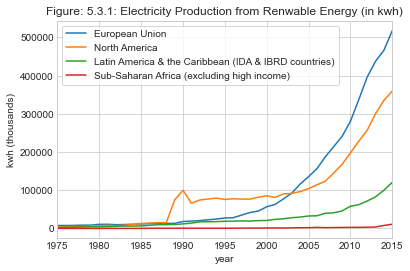

In [15]:
#we plot the figures from above, but this time not interactively
regions = ['European Union','North America','Latin America & the Caribbean (IDA & IBRD countries)', 'Sub-Saharan Africa (excluding high income)']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for i in regions:
    wb_rnwx_kwh_.xs(i).plot(x='year',y='e_in_kwh_thousand',ax=ax,label=i)

ax.legend(frameon=True)
ax.set_ylabel('kwh (thousands)')
ax.set_xlim(1975, 2015) #removes the space between the border and 2015/1975
ax.set_title('Figure: 5.3.1:'' ''Electricity Production from Renwable Energy (in kwh)')

### Difference in Electricity Production from Renewable Energy from the Mean Electricity Production

Text(0.5, 1.0, 'Figure 5.3.2: Difference in Production from the Mean Value')

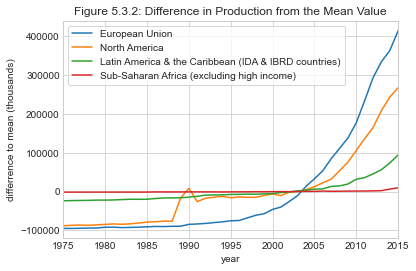

In [16]:
regions = ['European Union','North America','Latin America & the Caribbean (IDA & IBRD countries)', 'Sub-Saharan Africa (excluding high income)']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for i in regions:
    wb_rnwx_kwh_.xs(i).plot(x='year',y='demean',ax=ax,label=i)

ax.legend(frameon=True)
ax.set_ylabel('differrence to mean (thousands)')
ax.set_xlim(1975, 2015)
ax.set_title('Figure 5.3.2:' ' ' 'Difference in Production from the Mean Value')